## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [44]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [45]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

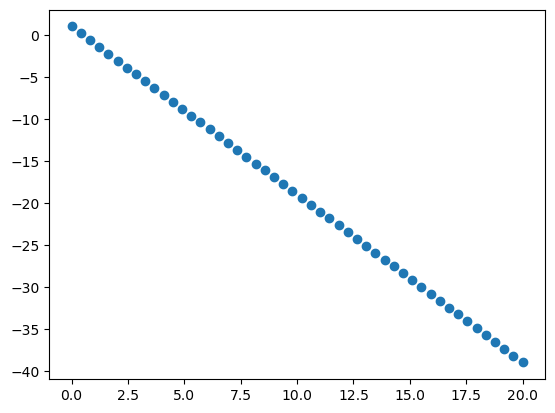

In [5]:
plt.scatter(X,y)

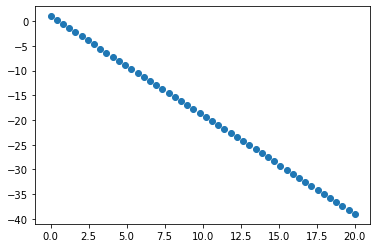

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [6]:
def GD(X,y,learning_rate,max_iter):
    theta_0 = 0
    theta_1 = 0
    learningRate = learning_rate
    cost = []
    theta_0_values = []
    theta_1_values = []
    hypothesis = []
    returns = []
    for i in range(max_iter):
        print(f"****************Iteration{i}*******************")
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        h = theta_0+theta_1*X
        hypothesis.append(h)
        print("h(X):",h)

        error_vector = h-y
        print("Error vector:\n",error_vector)
        s = (h-y)@(h-y)
        E = s/(2*len(y))
        cost.append(E)
        print("j:\n",E)

        d_theta_0  = (1/len(y))*sum(h-y)
        d_theta_1 = (1/len(y))*sum((h-y)*X)

        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        gradient_vector_norm =  np.linalg.norm(gradient_vector)
        print("gradient_vector:",gradient_vector)
        print("gradient_vector_norm:",gradient_vector_norm)

        if gradient_vector_norm < 0.001: 
            break
        if i>0:
            if cost[i-1]-cost[i] < 0.001:
                break

        theta_0 = theta_0-learningRate*d_theta_0
        theta_1 = theta_1-learningRate*d_theta_1

        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        
        
        
    return theta_0_values,theta_1_values,cost,hypothesis,theta_0,theta_1,i

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
theta_0_values,theta_1_values,cost,hypothesis,theta_0,theta_1,i = GD(X,y,0.0005,300)
print("*************training report************\n")
print(f"Gradient Descent converged after {i} iterations\n")
print("theta_0_values:\n",theta_0_values,"\n")
print("theta_1_values:\n",theta_1_values,"\n")
print("cost:\n",cost,"\n")
print("hypothesis:\n",hypothesis,"\n")
print("last_cost_reached:\n",cost[-1],"\n")
print("theta_0:\n",theta_0,"\n")
print("theta_1:\n",theta_1,"\n")
print("h(x) = y_predict:\n",hypothesis[-1],"\n")
print("y_actual:\n",y,"\n")

****************Iteration0*******************
h(X): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j:
 249.88775510204084
gradient_vector: [[ 19.       ]
 [259.3877551]]
gradient_vector_norm: 260.0826935743251
theta_0_new: -0.0095
theta_1_new: -0.1296938775510204
*****

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [8]:
r2_score(y,hypothesis[-1])

0.9975395965150151

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

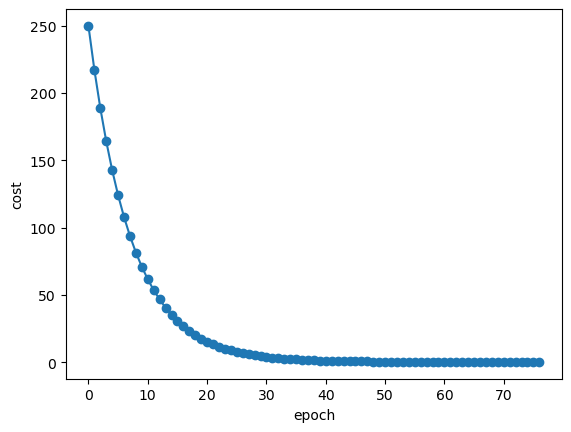

In [9]:
def loss_vs_epochs(loss):
    plt.plot(loss,marker = "o")
    plt.xlabel("epoch")
    plt.ylabel("cost")
    
loss_vs_epochs(cost)

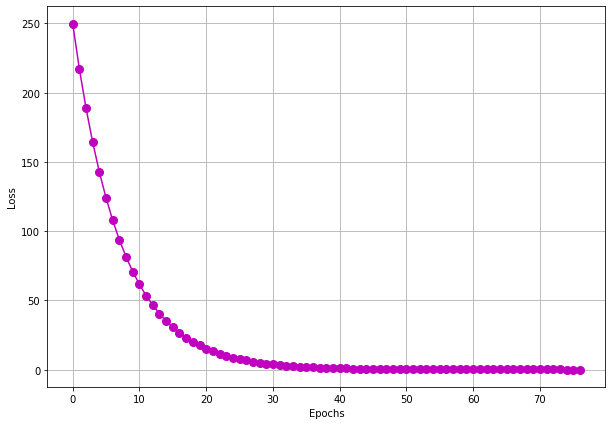

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [10]:
def Theta_vs_loss (theta,loss,xlabel):
    plt.plot(theta,loss,marker = "o")
    plt.xlabel(xlabel)
    plt.ylabel("loss")
    

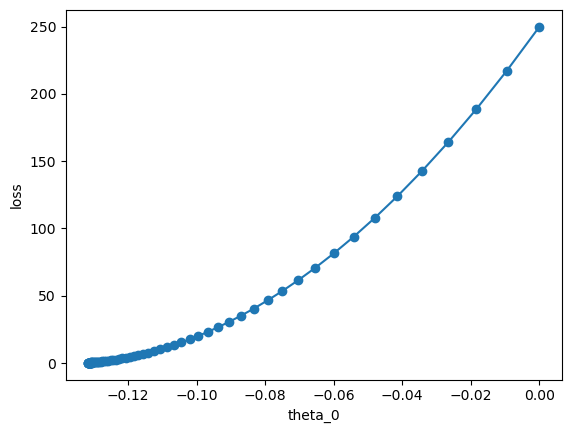

In [11]:
Theta_vs_loss (theta_0_values,cost,"theta_0")

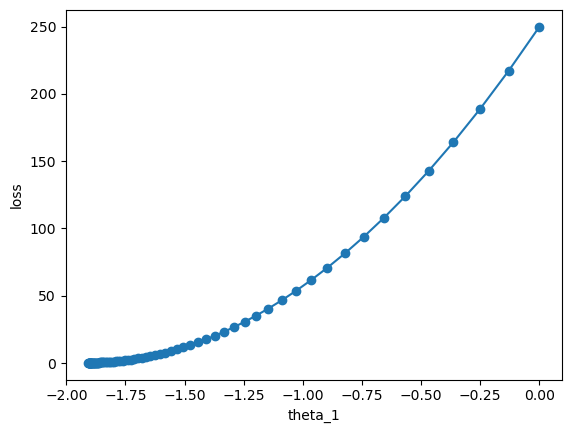

In [12]:
Theta_vs_loss (theta_1_values,cost,"theta_1")

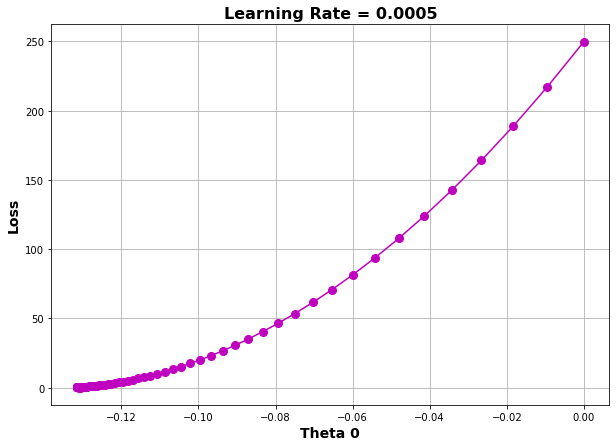

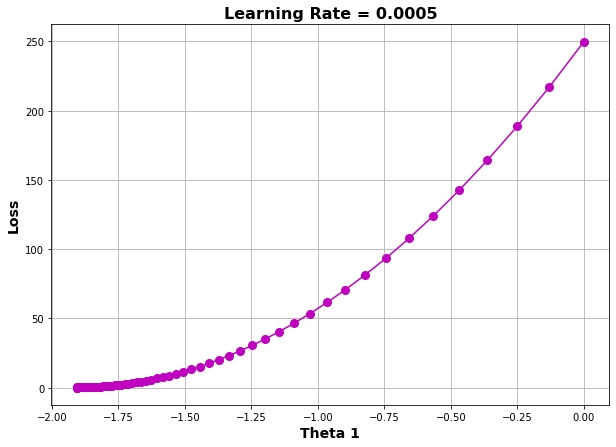

#### Plot all regression lines till converge

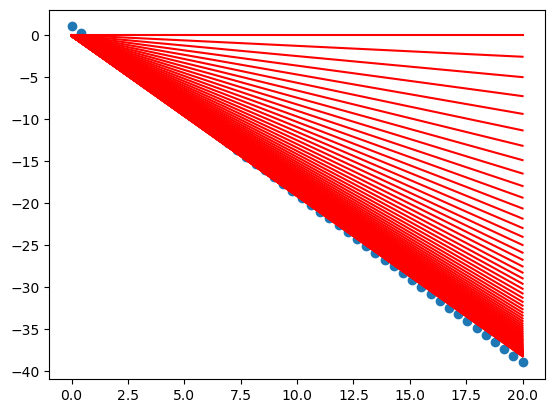

In [13]:
def regression_lines_plot():
    plt.scatter(X,y)
    for i in range(len(hypothesis)):
        plt.plot(X,hypothesis[i],"r")

regression_lines_plot()

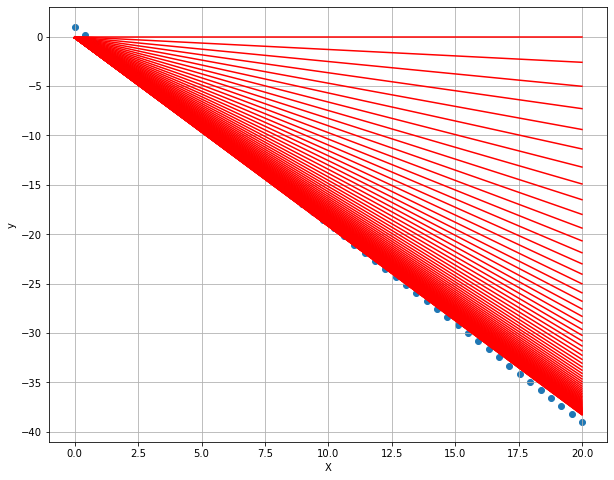

#### Plot the best regression line

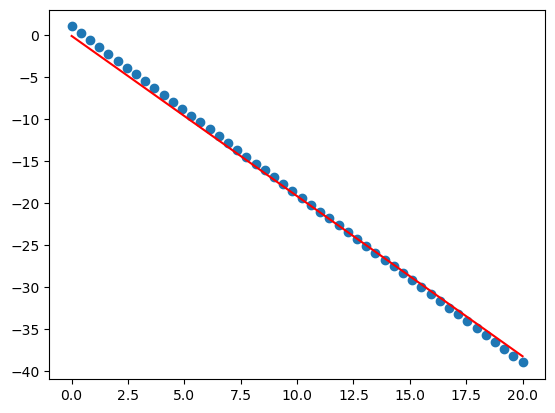

In [14]:
def best_regression_line_plot():
    plt.scatter(X,y)
    plt.plot(X,hypothesis[-1],"r")
    
best_regression_line_plot()    

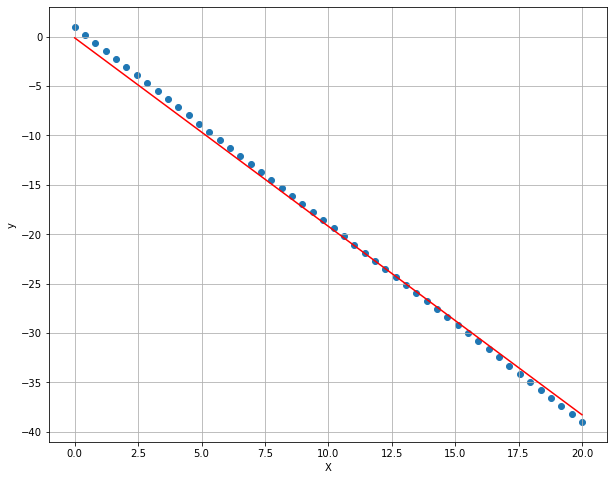

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [15]:
theta_0_values,theta_1_values,cost,hypothesis,theta_0,theta_1,i = GD(X,y,0.00005 ,1000)
print("*************training report************\n")
print(f"Gradient Descent converged after {i} iterations\n")
print("last_cost_reached:\n",cost[-1],"\n")
print("theta_0:\n",theta_0,"\n")
print("theta_1:\n",theta_1,"\n")
print("h(x) = y_predict:\n",hypothesis[-1],"\n")
print("y_actual:\n",y,"\n")

****************Iteration0*******************
h(X): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j:
 249.88775510204084
gradient_vector: [[ 19.       ]
 [259.3877551]]
gradient_vector_norm: 260.0826935743251
theta_0_new: -0.00095
theta_1_new: -0.01296938775510204
***

h(X): [ -0.12705589  -0.85621507  -1.58537426  -2.31453344  -3.04369262
  -3.77285181  -4.50201099  -5.23117017  -5.96032936  -6.68948854
  -7.41864773  -8.14780691  -8.87696609  -9.60612528 -10.33528446
 -11.06444364 -11.79360283 -12.52276201 -13.25192119 -13.98108038
 -14.71023956 -15.43939875 -16.16855793 -16.89771711 -17.6268763
 -18.35603548 -19.08519466 -19.81435385 -20.54351303 -21.27267222
 -22.0018314  -22.73099058 -23.46014977 -24.18930895 -24.91846813
 -25.64762732 -26.3767865  -27.10594569 -27.83510487 -28.56426405
 -29.29342324 -30.02258242 -30.7517416  -31.48090079 -32.21005997
 -32.93921915 -33.66837834 -34.39753752 -35.12669671 -35.85585589]
Error vector:
 [-1.12705589 -1.03988854 -0.95272119 -0.86555385 -0.7783865  -0.69121915
 -0.60405181 -0.51688446 -0.42971711 -0.34254977 -0.25538242 -0.16821507
 -0.08104773  0.00611962  0.09328697  0.18045432  0.26762166  0.35478901
  0.44195636  0.5291237   0.61629105  0.7034584   0.79062574  0.87779309
  0.96496044  1.05212778  1

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [65]:
r2_score(y,hypothesis[-1])

0.9965793400861428

r2_score: 0.9965793400861428


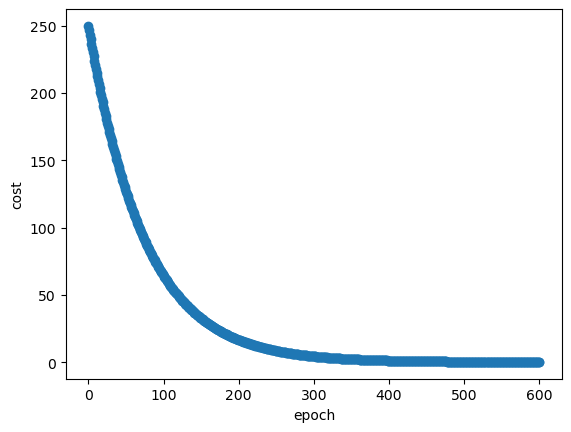

In [69]:
loss_vs_epochs(cost)

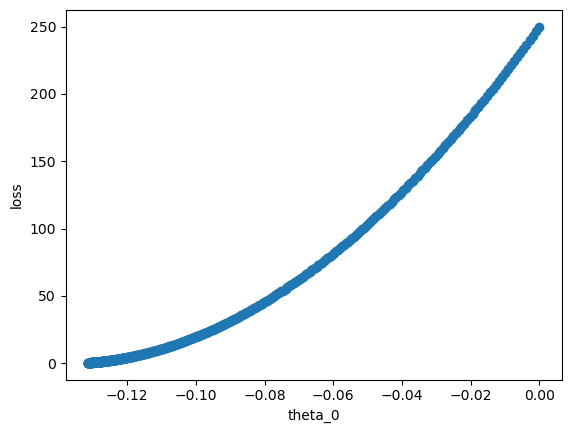

In [70]:
Theta_vs_loss (theta_0_values,cost,"theta_0")

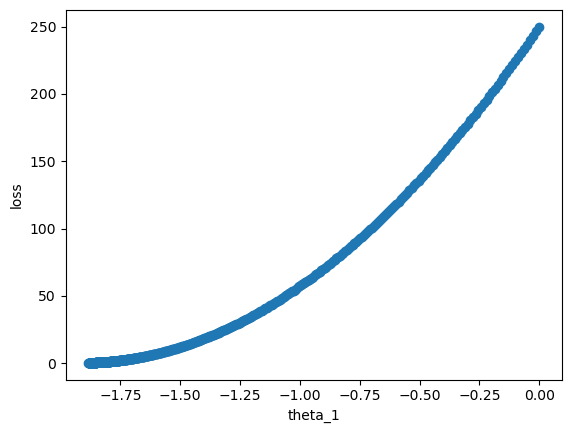

In [71]:
Theta_vs_loss (theta_1_values,cost,"theta_1")

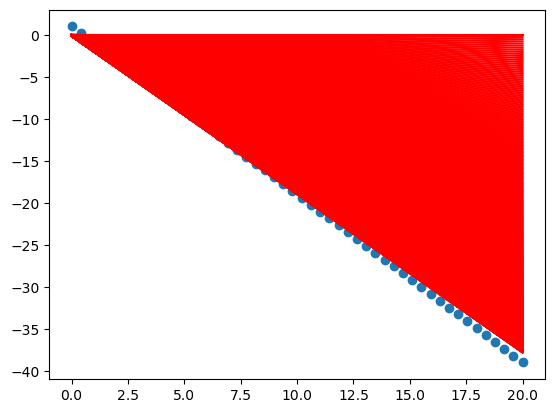

In [72]:
regression_lines_plot()

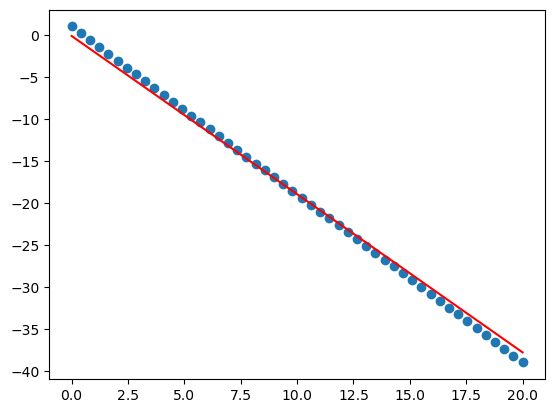

In [73]:
best_regression_line_plot()

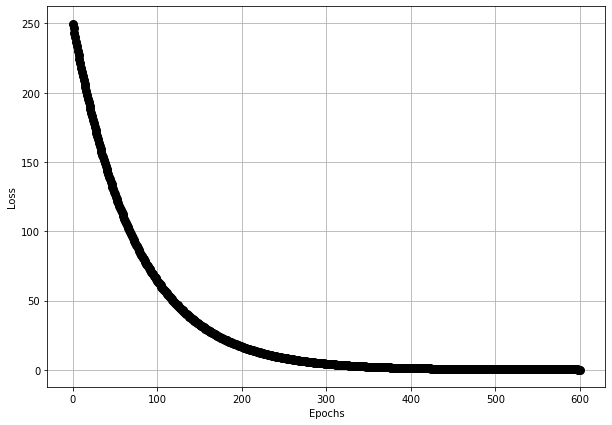

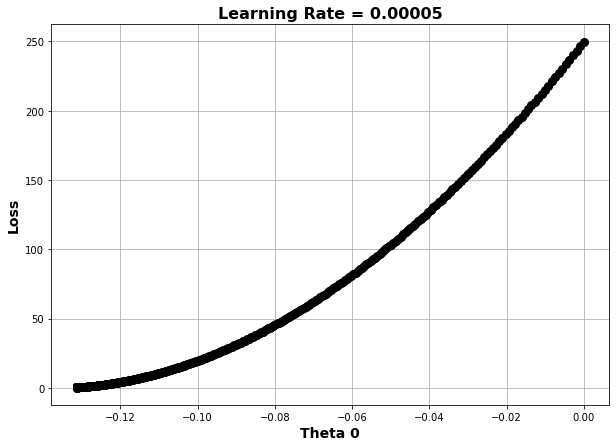

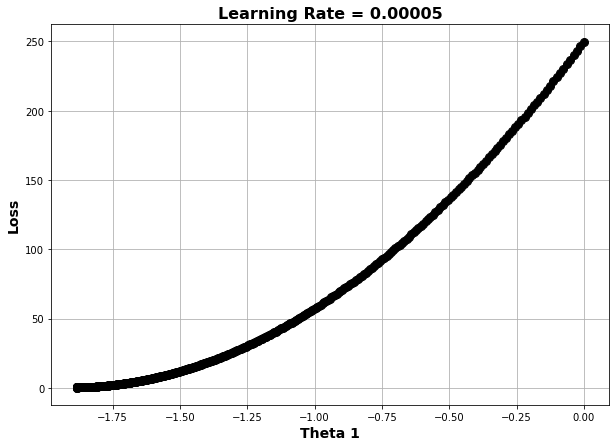

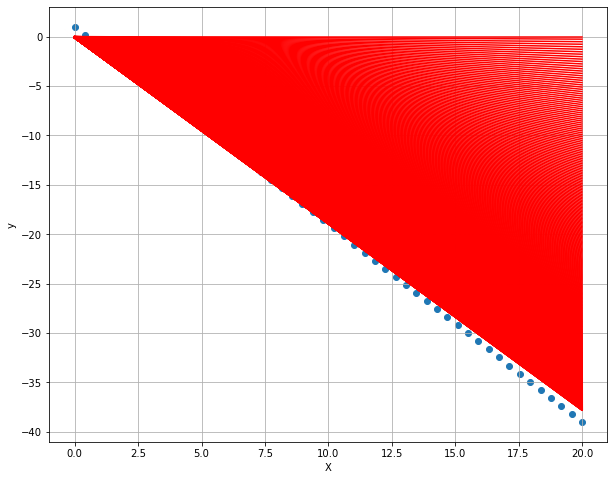

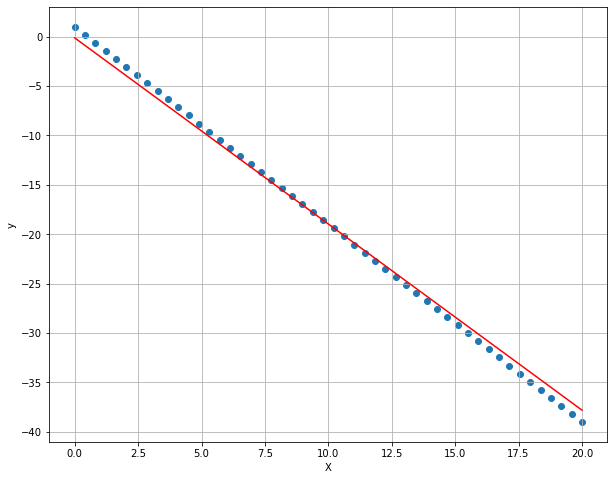

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [74]:
theta_0_values,theta_1_values,cost,hypothesis,theta_0,theta_1,i = GD(X,y, 0.005 ,300)
print("*************training report************\n")
print(f"Gradient Descent converged after {i} iterations\n")
print("last_cost_reached:\n",cost[-1],"\n")
print("theta_0:\n",theta_0,"\n")
print("theta_1:\n",theta_1,"\n")
print("h(x) = y_predict:\n",hypothesis[-1],"\n")
print("y_actual:\n",y,"\n")

****************Iteration0*******************
h(X): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j:
 249.88775510204084
gradient_vector: [[ 19.       ]
 [259.3877551]]
gradient_vector_norm: 260.0826935743251
theta_0_new: -0.095
theta_1_new: -1.296938775510204
*******

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [75]:
r2_score(y,hypothesis[-1])

0.9976200723230484

r2_score: 0.9976200723230484


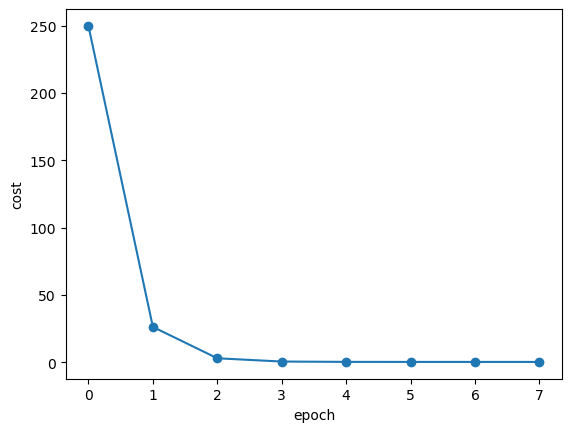

In [76]:
loss_vs_epochs(cost)

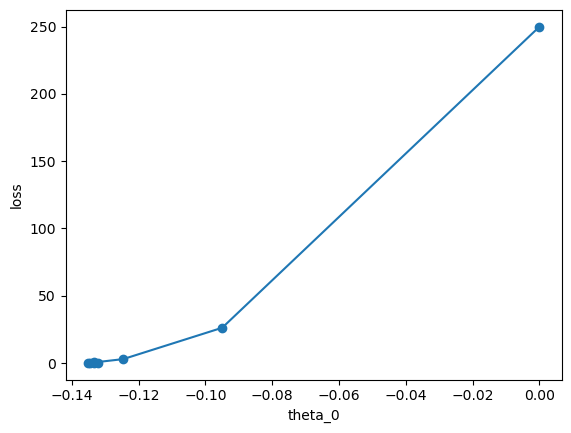

In [77]:
Theta_vs_loss (theta_0_values,cost,"theta_0")

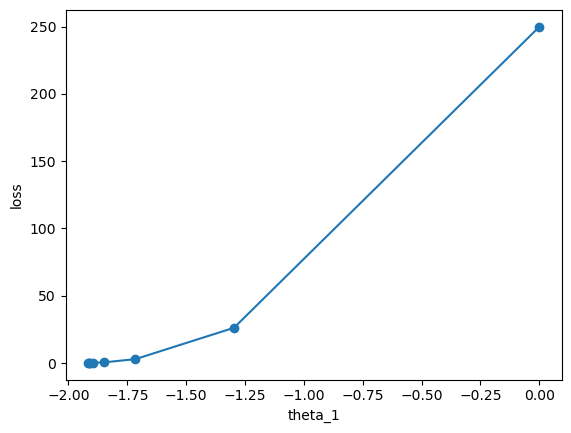

In [78]:
Theta_vs_loss (theta_1_values,cost,"theta_1")

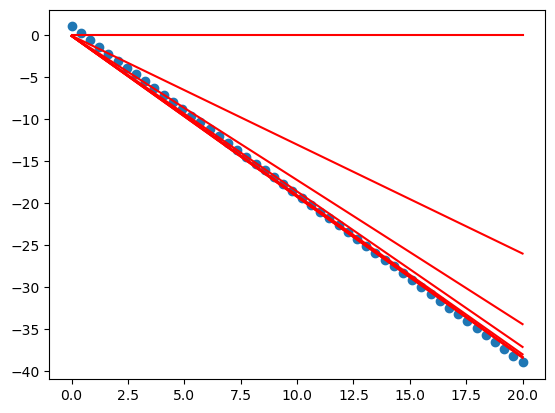

In [79]:
regression_lines_plot()

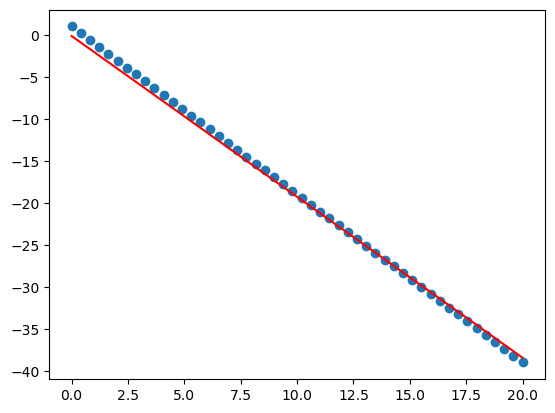

In [81]:
best_regression_line_plot()

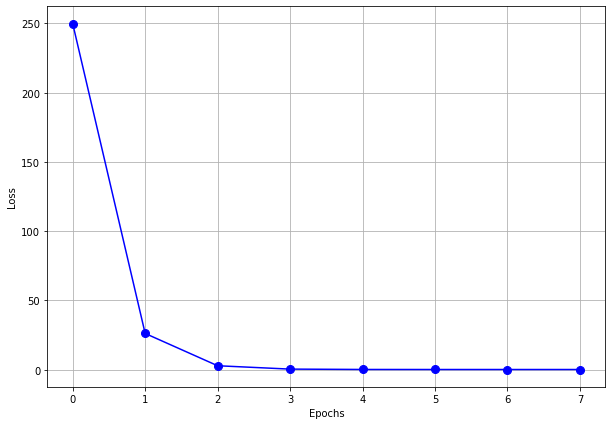

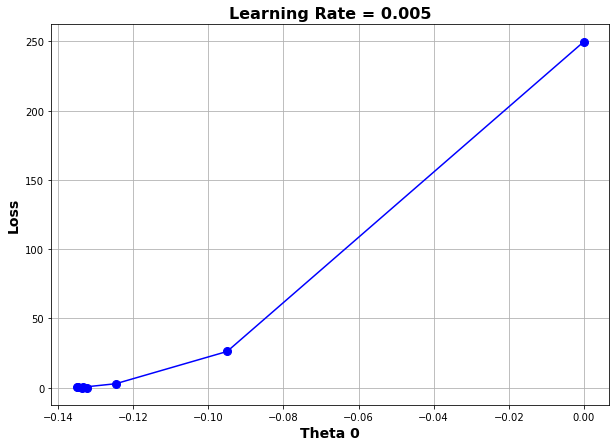

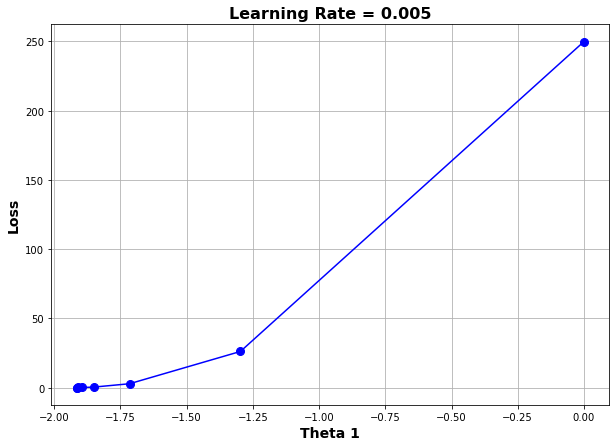

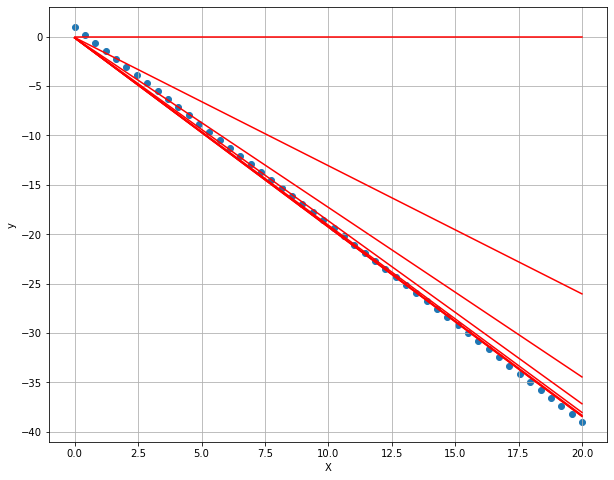

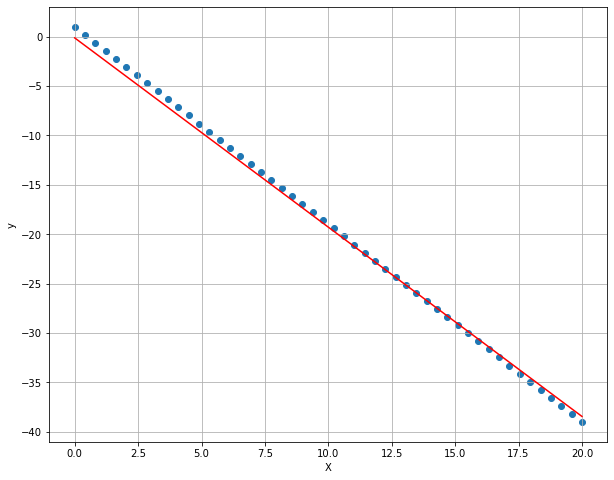

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [48]:
data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
data

array([[  0.        ,   1.        ],
       [  0.40816327,   0.18367347],
       [  0.81632653,  -0.63265306],
       [  1.2244898 ,  -1.44897959],
       [  1.63265306,  -2.26530612],
       [  2.04081633,  -3.08163265],
       [  2.44897959,  -3.89795918],
       [  2.85714286,  -4.71428571],
       [  3.26530612,  -5.53061224],
       [  3.67346939,  -6.34693878],
       [  4.08163265,  -7.16326531],
       [  4.48979592,  -7.97959184],
       [  4.89795918,  -8.79591837],
       [  5.30612245,  -9.6122449 ],
       [  5.71428571, -10.42857143],
       [  6.12244898, -11.24489796],
       [  6.53061224, -12.06122449],
       [  6.93877551, -12.87755102],
       [  7.34693878, -13.69387755],
       [  7.75510204, -14.51020408],
       [  8.16326531, -15.32653061],
       [  8.57142857, -16.14285714],
       [  8.97959184, -16.95918367],
       [  9.3877551 , -17.7755102 ],
       [  9.79591837, -18.59183673],
       [ 10.20408163, -19.40816327],
       [ 10.6122449 , -20.2244898 ],
 

In [49]:
np.random.seed(101)
np.random.shuffle(data)

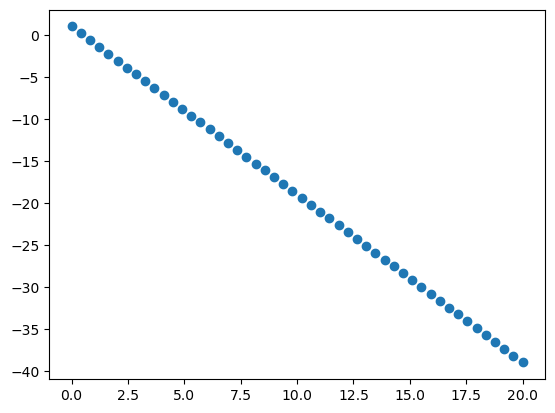

In [108]:
plt.scatter(X,y)

In [97]:
X = data[:,0]
y = data[:,-1]

In [98]:
X,y

(array([15.10204082,  5.71428571,  8.57142857, 13.06122449,  8.97959184,
         0.40816327, 10.6122449 , 18.7755102 , 17.14285714, 19.18367347,
         6.53061224,  9.79591837,  2.85714286, 18.36734694,  7.34693878,
         1.2244898 , 16.73469388, 12.24489796,  6.12244898,  8.16326531,
        17.55102041, 15.51020408, 17.95918367, 15.91836735,  4.08163265,
        20.        , 10.20408163, 13.46938776, 14.69387755,  0.81632653,
        11.02040816, 13.87755102, 14.28571429,  3.26530612,  7.75510204,
        11.83673469,  4.89795918,  2.04081633,  0.        , 11.42857143,
         1.63265306, 16.32653061,  5.30612245,  3.67346939, 19.59183673,
         9.3877551 ,  2.44897959,  6.93877551,  4.48979592, 12.65306122]),
 array([-29.20408163, -10.42857143, -16.14285714, -25.12244898,
        -16.95918367,   0.18367347, -20.2244898 , -36.55102041,
        -33.28571429, -37.36734694, -12.06122449, -18.59183673,
         -4.71428571, -35.73469388, -13.69387755,  -1.44897959,
        -32.

In [119]:
def St_GD_LR_1var(X,y,learning_rate,max_iter):
    theta_0 = 0
    theta_1 = 0
    cost = []
    theta_0_values = []
    theta_1_values = []
#     hypothesis = []
#     gradient_norm = []

    for i in range(max_iter):
        print(f"****************epoch{i}*******************")
        for m in range(len(y)):
            
            theta_0_values.append(theta_0)
            theta_1_values.append(theta_1)
            h = theta_0+theta_1*X[m]
#             hypothesis.append(h)
            

            error_vector = h-y[m]
            s = (h-y[m])*(h-y[m])
            E = s/2
            cost.append(E)
            

            d_theta_0  = h-y[m]
            d_theta_1 = (h-y[m])*X[m]

            gradient_vector = np.array([[d_theta_0],[d_theta_1]])
            gradient_vector_norm =  np.linalg.norm(gradient_vector)
#             gradient_norm.append(gradient_vector_norm)
                

            theta_0 = theta_0-learning_rate*d_theta_0
            theta_1 = theta_1-learning_rate*d_theta_1
        
        print("j:\n",E)
        print("gradient_vector:",gradient_vector)
        print("gradient_vector_norm:",gradient_vector_norm)
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        if gradient_vector_norm < 0.001: 
                break
        if i>0 :  
            if abs(cost[-1]-cost[-(len(y)+1)]) < 0.001:
                break
       
        
    return theta_0_values,theta_1_values,cost,theta_0,theta_1

In [120]:
loss_St

[426.4391920033319,
 41.89649937157835,
 98.13060058212156,
 222.39824979861257,
 83.61195039315206,
 0.09330012877436776,
 110.25721240403426,
 327.37429685516975,
 183.18727074810084,
 169.08179385114428,
 9.64257146184898,
 24.3989152753499,
 0.6824103354906796,
 89.55724534785945,
 7.1847516410756995,
 0.0448800751664024,
 48.037315613790895,
 17.22041929856293,
 2.334124085344088,
 5.100540981417963,
 31.267763909336022,
 16.700541209425772,
 18.358944541139522,
 9.571057755886983,
 0.010787471580856632,
 12.896709035316267,
 1.1585014124513553,
 2.560342383955796,
 2.7509251724852666,
 0.4476943737548553,
 0.8345105398367243,
 1.6542591084679508,
 1.4866233378310676,
 0.13291372900459716,
 0.055017909281756795,
 0.5873829785675623,
 0.029765250157687256,
 0.28722358780364887,
 0.634858765160752,
 0.45174043344323567,
 0.3518897130205238,
 1.55409797426965,
 0.03498761905617297,
 0.13899773588494788,
 2.186443126860246,
 0.024593952070951126,
 0.30297305253286183,
 0.0085312808577

In [106]:
y

array([-29.20408163, -10.42857143, -16.14285714, -25.12244898,
       -16.95918367,   0.18367347, -20.2244898 , -36.55102041,
       -33.28571429, -37.36734694, -12.06122449, -18.59183673,
        -4.71428571, -35.73469388, -13.69387755,  -1.44897959,
       -32.46938776, -23.48979592, -11.24489796, -15.32653061,
       -34.10204082, -30.02040816, -34.91836735, -30.83673469,
        -7.16326531, -39.        , -19.40816327, -25.93877551,
       -28.3877551 ,  -0.63265306, -21.04081633, -26.75510204,
       -27.57142857,  -5.53061224, -14.51020408, -22.67346939,
        -8.79591837,  -3.08163265,   1.        , -21.85714286,
        -2.26530612, -31.65306122,  -9.6122449 ,  -6.34693878,
       -38.18367347, -17.7755102 ,  -3.89795918, -12.87755102,
        -7.97959184, -24.30612245])

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [121]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0005,300)

****************epoch0*******************
j:
 0.25209950460007696
gradient_vector: [[0.71006972]
 [8.98455566]]
gradient_vector_norm: 9.012571185993627
theta_0_new: -0.12761222125212127
theta_1_new: -1.8592841835063174
****************epoch1*******************
j:
 0.00017746175474585356
gradient_vector: [[0.01883941]
 [0.23837626]]
gradient_vector_norm: 0.23911955711901475
theta_0_new: -0.12397684636948911
theta_1_new: -1.909800583000258
****************epoch2*******************
j:
 3.587899143823388e-08
gradient_vector: [[0.00026788]
 [0.00338946]]
gradient_vector_norm: 0.0034000305958517907
theta_0_new: -0.1168602386254817
theta_1_new: -1.9117125478064034


In [123]:
 h = opt_theta_0_St+opt_theta_1_St*X

In [124]:
r2_score(y,h)

0.9976568143190673

r2_score: 0.9976567971049898


Text(0.5, 0, 'cost')

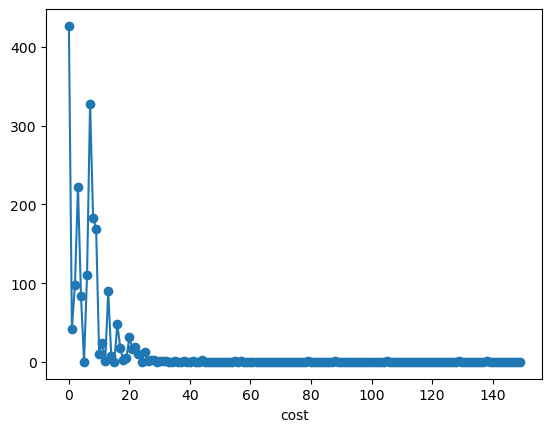

In [125]:
plt.plot(loss_St,marker="o")
plt.xlabel("iterations")
plt.xlabel("cost")

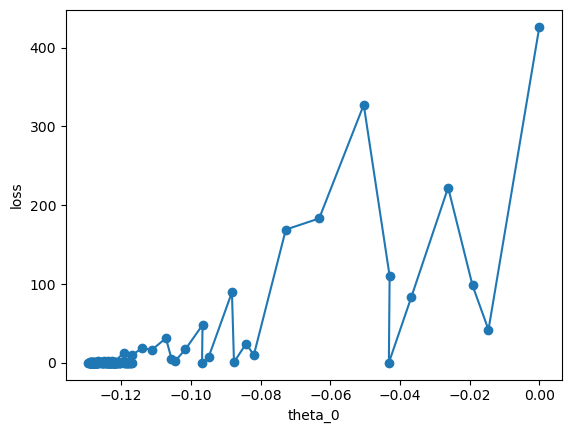

In [126]:
Theta_vs_loss (all_theta_0_St,loss_St,"theta_0")

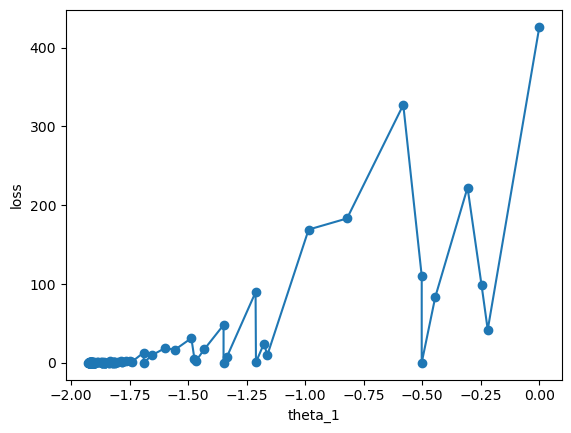

In [127]:
Theta_vs_loss (all_theta_1_St,loss_St,"theta_1")

Text(0.5, 1.0, 'best_line_fit')

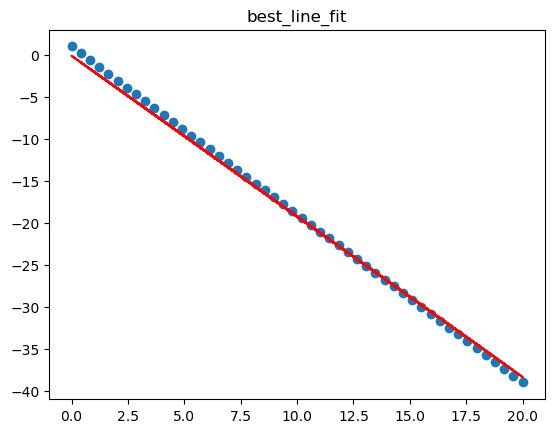

In [128]:
plt.scatter(X,y)
plt.plot(X,h,"r")
plt.title("best_line_fit")

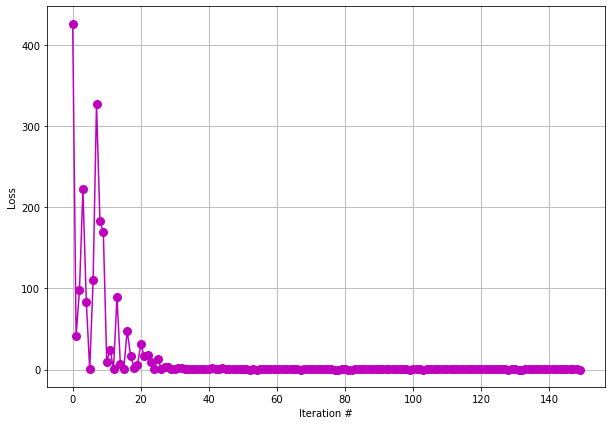

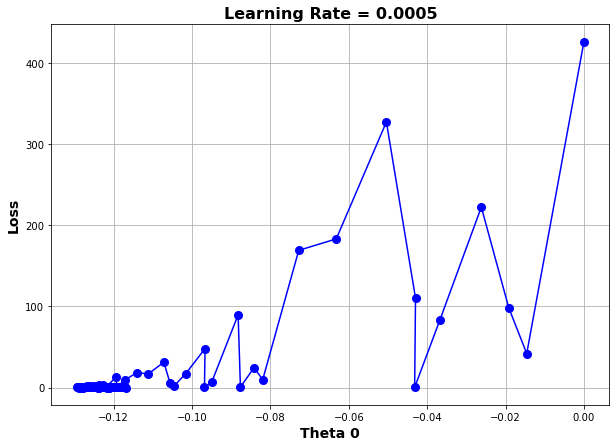

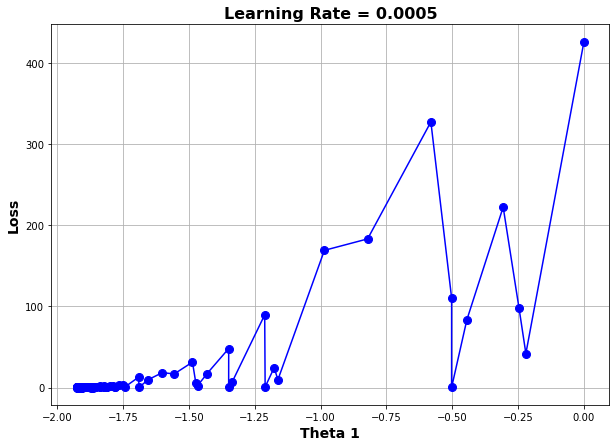

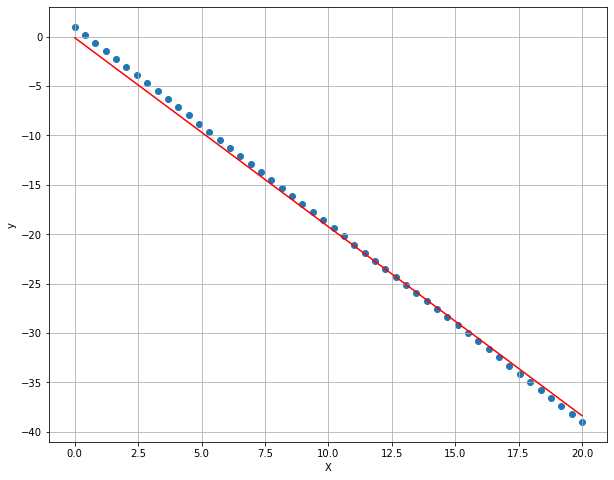

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [129]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0001,300)

****************epoch0*******************
j:
 77.08339441916262
gradient_vector: [[ 12.41639194]
 [157.10536742]]
gradient_vector_norm: 157.59525139074904
theta_0_new: -0.0684094452130673
theta_1_new: -0.9500743631688013
****************epoch1*******************
j:
 19.384194190624033
gradient_vector: [[ 6.22642661]
 [78.78335716]]
gradient_vector_norm: 79.02901842704571
theta_0_new: -0.10214664348275128
theta_1_new: -1.428733851630339
****************epoch2*******************
j:
 4.830561509456486
gradient_vector: [[ 3.10823471]
 [39.3286841 ]]
gradient_vector_norm: 39.45131830456044
theta_0_new: -0.11841844022588549
theta_1_new: -1.6699154908906342
****************epoch3*******************
j:
 1.181899543652157
gradient_vector: [[ 1.53746515]
 [19.45364067]]
gradient_vector_norm: 19.514300769285008
theta_0_new: -0.12589287520313883
theta_1_new: -1.7914663162395936
****************epoch4*******************
j:
 0.2784205564157234
gradient_vector: [[0.74621787]
 [9.44194042]]
gradient_v

****************** Epoch 0 ********************

Cost = 77.08339441916262

Gradient Vector:
[[ 12.41639194]
 [157.10536742]]

Gradient Vector Norm:
157.59525139074904

theta_0_new : -0.06716780601894395
theta_1_new : -0.9343638264268326

****************** Epoch 1 ********************

Cost = 19.384194190624033

Gradient Vector:
[[ 6.22642661]
 [78.78335716]]

Gradient Vector Norm:
79.02901842704571

theta_0_new : -0.10152400082133746
theta_1_new : -1.4208555159144907

****************** Epoch 2 ********************

Cost = 4.830561509456486

Gradient Vector:
[[ 3.10823471]
 [39.3286841 ]]

Gradient Vector Norm:
39.45131830456044

theta_0_new : -0.1181076167547815
theta_1_new : -1.665982622480747

****************** Epoch 3 ********************

Cost = 1.181899543652157

Gradient Vector:
[[ 1.53746515]
 [19.45364067]]

Gradient Vector Norm:
19.514300769285008

theta_0_new : -0.12573912868814405
theta_1_new : -1.7895209521723126

****************** Epoch 4 ********************

Cost = 0

In [130]:
 h = opt_theta_0_St+opt_theta_1_St*X

In [131]:
r2_score(y,h)

0.9976375173449827

r2_score =  0.9976377310288631


Text(0.5, 0, 'cost')

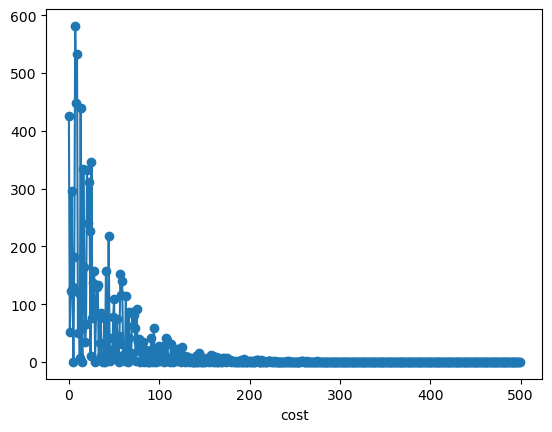

In [132]:
plt.plot(loss_St,marker="o")
plt.xlabel("iterations")
plt.xlabel("cost")

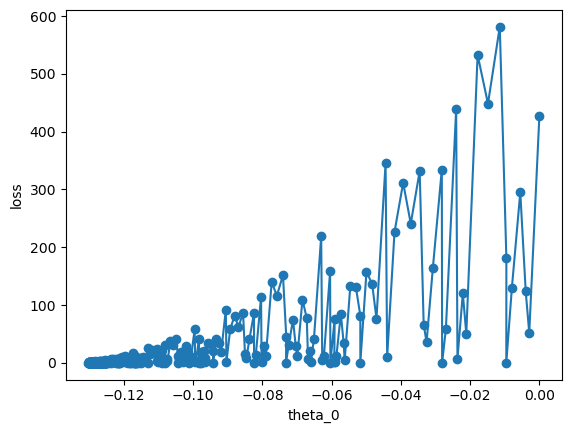

In [133]:
Theta_vs_loss (all_theta_0_St,loss_St,"theta_0")

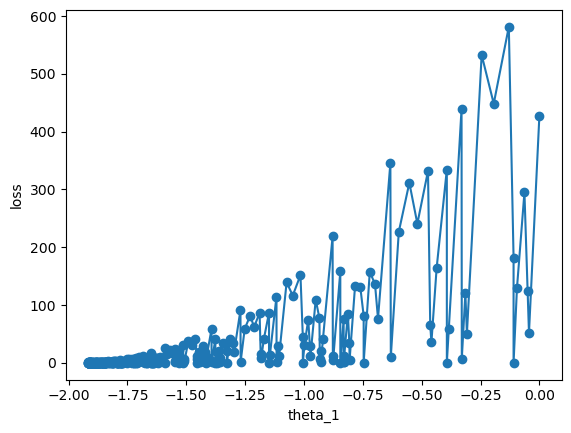

In [134]:
Theta_vs_loss (all_theta_1_St,loss_St,"theta_1")

Text(0.5, 1.0, 'best_line_fit')

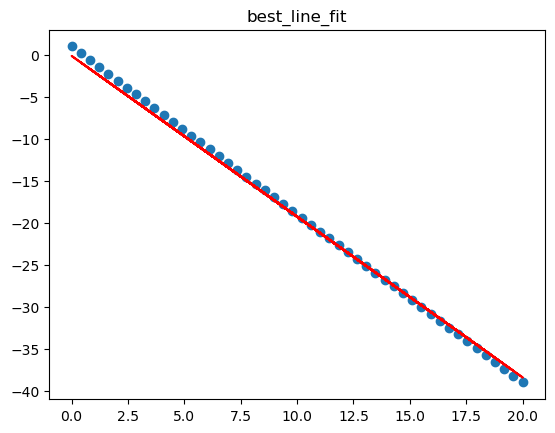

In [135]:
plt.scatter(X,y)
plt.plot(X,h,"r")
plt.title("best_line_fit")

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [136]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y, 0.00007 ,300)

****************epoch0*******************
j:
 115.77496572621477
gradient_vector: [[ 15.21676482]
 [192.53865685]]
gradient_vector_norm: 193.13902845642275
theta_0_new: -0.0526625963181957
theta_1_new: -0.7277523032709559
****************epoch1*******************
j:
 44.27618208821564
gradient_vector: [[  9.41022657]
 [119.06817298]]
gradient_vector_norm: 119.43944985086782
theta_0_new: -0.08492087485410607
theta_1_new: -1.1789316302972381
****************epoch2*******************
j:
 16.881779141921317
gradient_vector: [[ 5.81064181]
 [73.52240662]]
gradient_vector_norm: 73.75166325784151
theta_0_new: -0.10453040045312463
theta_1_new: -1.4586570394661047
****************epoch3*******************
j:
 6.40532844123651
gradient_vector: [[ 3.5791978 ]
 [45.28780888]]
gradient_vector_norm: 45.42902475523053
theta_0_new: -0.11629902421809676
theta_1_new: -1.6320942310148396
****************epoch4*******************
j:
 2.4109782978673917
gradient_vector: [[ 2.1958954]
 [27.7847989]]
gradien

****************** Epoch 0 ********************

Cost = 115.77496572621477

Gradient Vector:
[[ 15.21676482]
 [192.53865685]]

Gradient Vector Norm:
193.13902845642275

theta_0_new : -0.051597422781105656
theta_1_new : -0.7142745972914493

****************** Epoch 1 ********************

Cost = 44.27618208821564

Gradient Vector:
[[  9.41022657]
 [119.06817298]]

Gradient Vector Norm:
119.43944985086782

theta_0_new : -0.08426215899391709
theta_1_new : -1.1705968581887245

****************** Epoch 2 ********************

Cost = 16.881779141921317

Gradient Vector:
[[ 5.81064181]
 [73.52240662]]

Gradient Vector Norm:
73.75166325784151

theta_0_new : -0.10412365552618537
theta_1_new : -1.4535104710027915

****************** Epoch 3 ********************

Cost = 6.40532844123651

Gradient Vector:
[[ 3.5791978 ]
 [45.28780888]]

Gradient Vector Norm:
45.42902475523053

theta_0_new : -0.11604848037218528
theta_1_new : -1.6289240843931025

****************** Epoch 4 ********************

Cos

In [137]:
 h = opt_theta_0_St+opt_theta_1_St*X

In [138]:
r2_score(y,h)

0.9976193527156806

r2_score =  0.9976194344219209


Text(0.5, 0, 'cost')

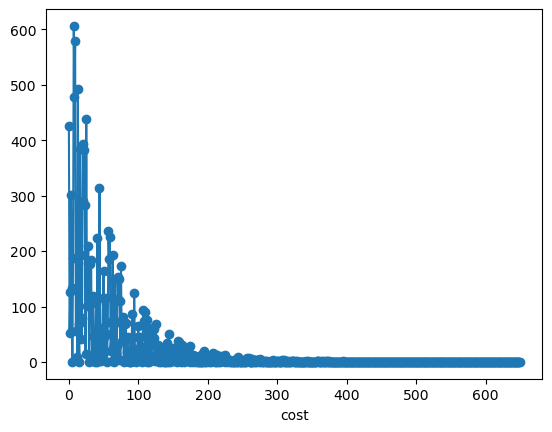

In [141]:
plt.plot(loss_St,marker="o")
plt.xlabel("iterations")
plt.xlabel("cost")

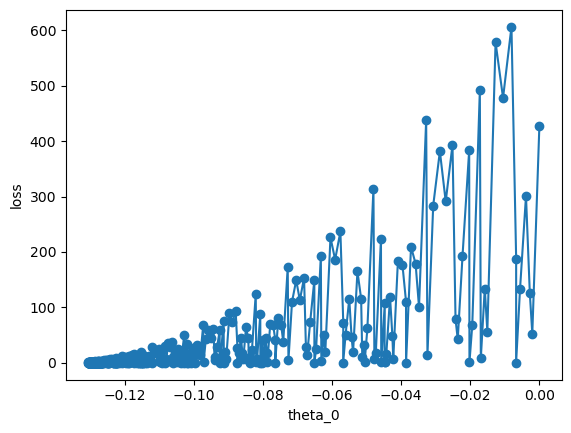

In [142]:
Theta_vs_loss (all_theta_0_St,loss_St,"theta_0")

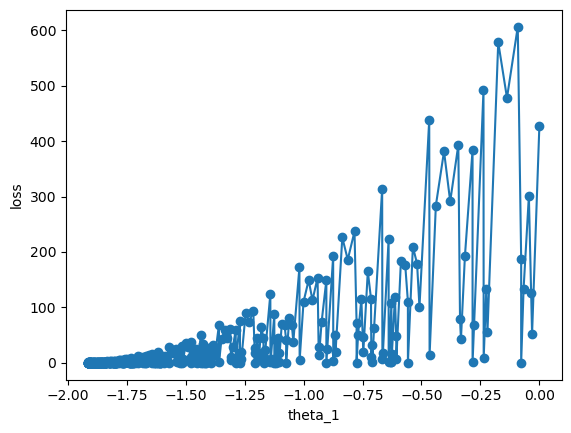

In [143]:
Theta_vs_loss (all_theta_1_St,loss_St,"theta_1")

Text(0.5, 1.0, 'best_line_fit')

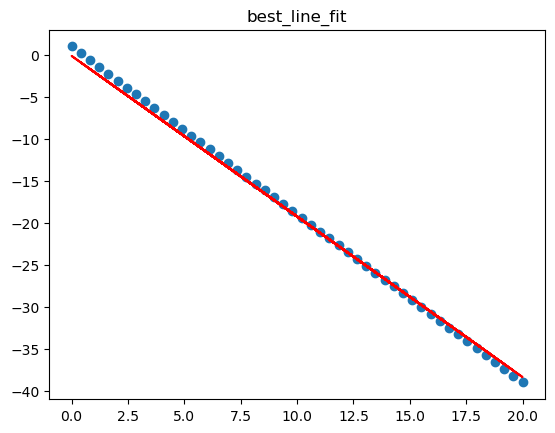

In [144]:
plt.scatter(X,y)
plt.plot(X,h,"r")
plt.title("best_line_fit")

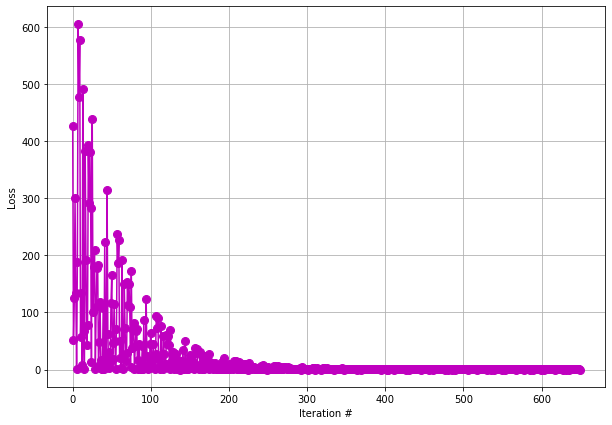

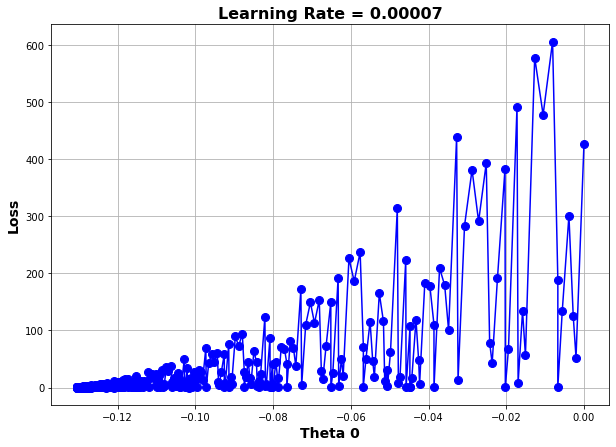

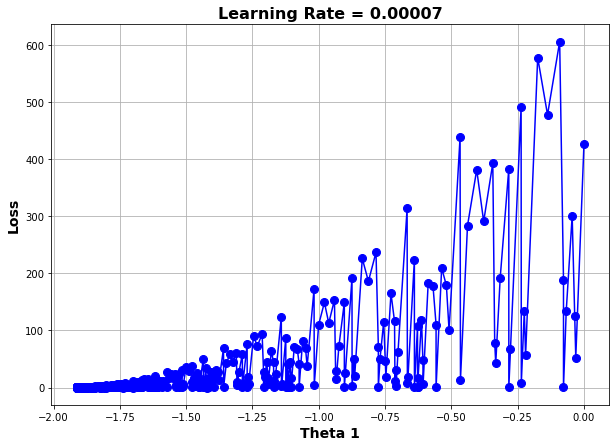

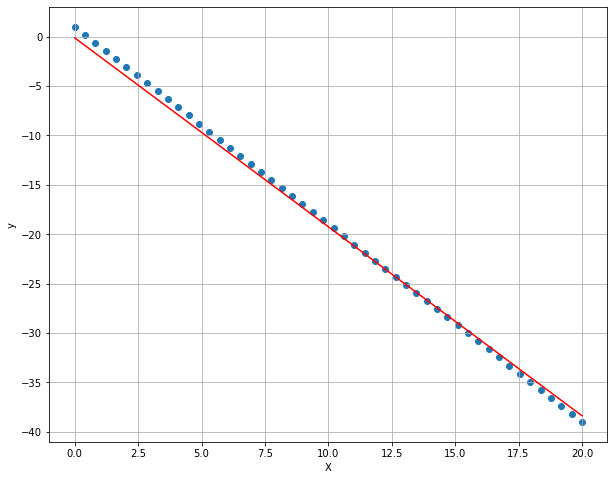

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

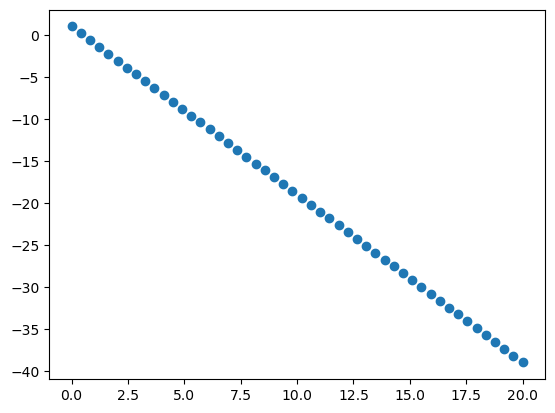

In [165]:
plt.scatter(X,y)

In [181]:
def MB_GD_LR_1var(X,y,learning_rate,max_iter,b):
    theta_0 = 0
    theta_1 = 0
    cost = []
    theta_0_values = []
    theta_1_values = []
    no_b = int(len(y)/b)
    for i in range(max_iter):
        print(f"****************epoch{i}*******************")
        for m in range(0,len(y),b):
            
            theta_0_values.append(theta_0)
            theta_1_values.append(theta_1)
            h = theta_0+theta_1*X[m:m+b]
            
            

            error_vector = h-y[m:m+b]
            s = (h-y[m:b+m])@(h-y[m:m+b])
            E = s/2*b
            cost.append(E)
            

            d_theta_0  = sum(h-y[m:b+m])/b
            d_theta_1 = ((h-y[m:b+m])@ X[m:m+b])/b
            

            gradient_vector = np.array([[d_theta_0],[d_theta_1]])
            gradient_vector_norm =  np.linalg.norm(gradient_vector)
            
                

            theta_0 = theta_0-learning_rate*d_theta_0
            theta_1 = theta_1-learning_rate*d_theta_1
            
        print("j:\n",E)
        print("gradient_vector_norm:",gradient_vector_norm)
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)   
        if gradient_vector_norm < 0.1: 
                    break
        if i>0 :  
            if abs(cost[-1]-cost[-(no_b+1)]) < 0.1:
                break
        
        
    return theta_0_values,theta_1_values,cost,theta_0,theta_1

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [182]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = MB_GD_LR_1var(X,y,0.0005,300,5)

****************epoch0*******************
j:
 718.7423452024456
gradient_vector_norm: 61.13413574891089
theta_0_new: -0.06978924724113063
theta_1_new: -0.9693635987180408
****************epoch1*******************
j:
 161.69919480240932
gradient_vector_norm: 28.767719999075442
theta_0_new: -0.103504017832776
theta_1_new: -1.44799256525687
****************epoch2*******************
j:
 34.55776295209736
gradient_vector_norm: 12.791153559071402
theta_0_new: -0.11940982177970424
theta_1_new: -1.6843464761632723
****************epoch3*******************
j:
 7.819709447202702
gradient_vector_norm: 4.9079938882509655
theta_0_new: -0.12652431396007574
theta_1_new: -1.8010894682190426
****************epoch4*******************
j:
 3.39413072248628
gradient_vector_norm: 1.0358419704182804
theta_0_new: -0.12929949643754896
theta_1_new: -1.858780649964289
****************epoch5*******************
j:
 3.3421109703872554
gradient_vector_norm: 0.935636560335367
theta_0_new: -0.1299333150292409
theta_1_

****************** Epoch 0 ********************

Cost = 2.8749693808097816

Gradient Vector:
[[ 6.55556162]
 [60.7816351 ]]

Gradient Vector Norm:
61.13413574891089

theta_0_new : -0.06651146643323301
theta_1_new : -0.9389727811670611

****************** Epoch 1 ********************

Cost = 0.6467967792096373

Gradient Vector:
[[ 2.96619847]
 [28.61439115]]

Gradient Vector Norm:
28.767719999075442

theta_0_new : -0.1020209185995134
theta_1_new : -1.4336853696843408

****************** Epoch 2 ********************

Cost = 0.13823105180838943

Gradient Vector:
[[ 1.19448224]
 [12.73525899]]

Gradient Vector Norm:
12.791153559071402

theta_0_new : -0.11881258066214856
theta_1_new : -1.677978846667892

****************** Epoch 3 ********************

Cost = 0.0312788377888108

Gradient Vector:
[[0.32013523]
 [4.89754198]]

Gradient Vector Norm:
4.907993888250965

theta_0_new : -0.12636424634268334
theta_1_new : -1.7986406972294153

****************** Epoch 4 ********************

Cost = 0

In [184]:
h = opt_theta_0_St+opt_theta_1_St*X
r2_score(y,h)

0.9968256200044286

r2_score 0.9968499473135748


Text(0.5, 0, 'cost')

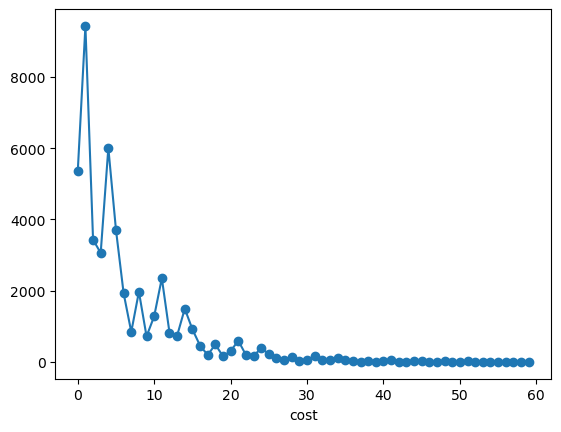

In [185]:
plt.plot(loss_St,marker="o")
plt.xlabel("iterations")
plt.xlabel("cost")

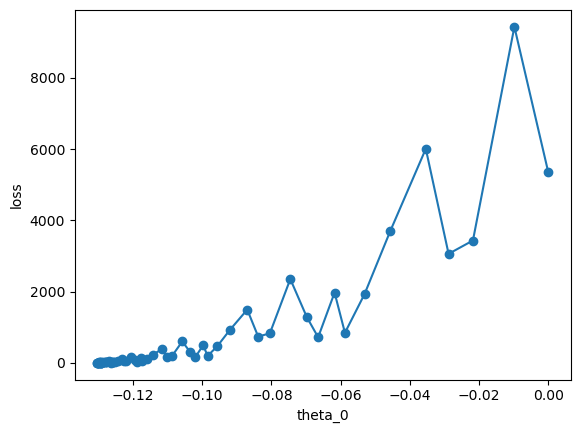

In [186]:
Theta_vs_loss (all_theta_0_St,loss_St,"theta_0")

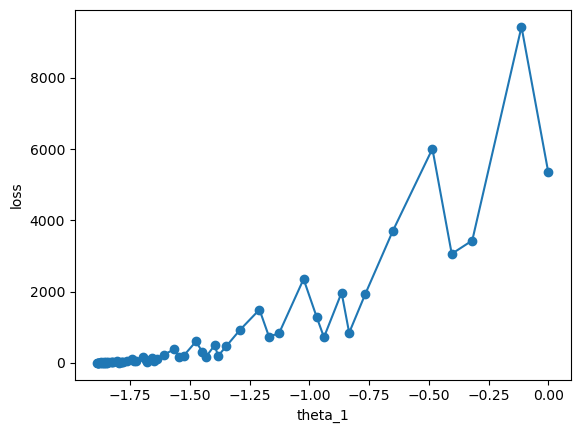

In [187]:
Theta_vs_loss (all_theta_1_St,loss_St,"theta_1")

Text(0.5, 1.0, 'best_line_fit')

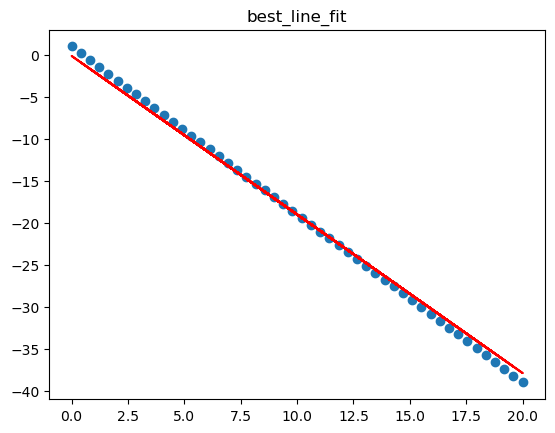

In [188]:
plt.scatter(X,y)
plt.plot(X,h,"r")
plt.title("best_line_fit")

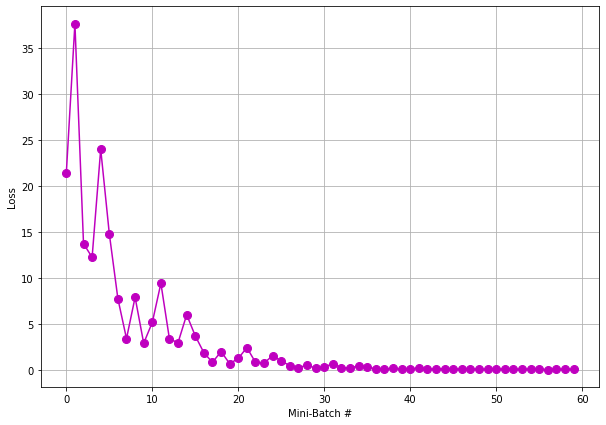

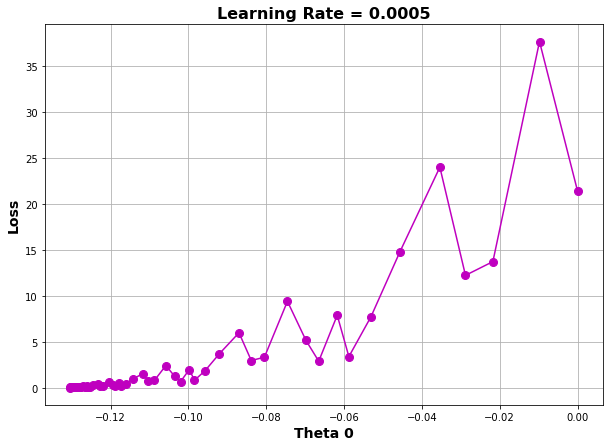

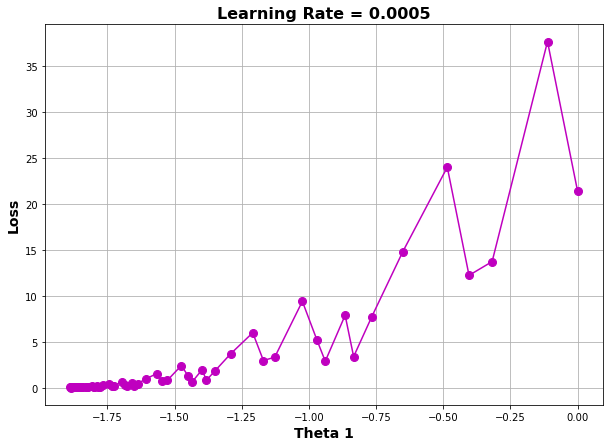

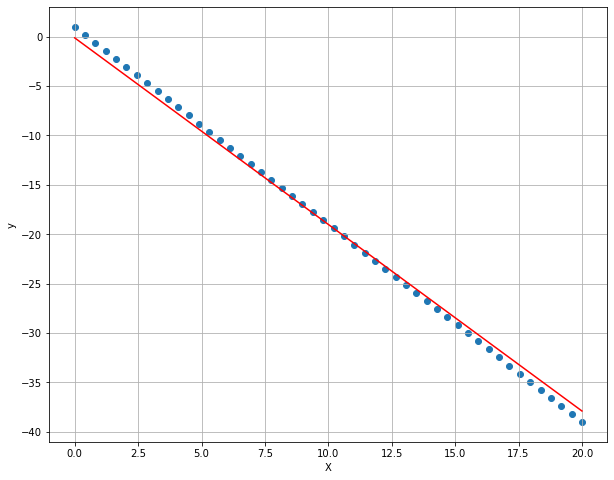

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [190]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = MB_GD_LR_1var(X,y,0.0005,300,10)

****************epoch0*******************
j:
 10273.346702490926
gradient_vector_norm: 144.8928187653709
theta_0_new: -0.04124848216567694
theta_1_new: -0.5683087110235961
****************epoch1*******************
j:
 5067.396313911797
gradient_vector_norm: 101.65126382467814
theta_0_new: -0.07003863931709524
theta_1_new: -0.9679738990170041
****************epoch2*******************
j:
 2500.0619176542023
gradient_vector_norm: 71.24301890211146
theta_0_new: -0.0900679276338996
theta_1_new: -1.2490447040747128
****************epoch3*******************
j:
 1235.4639621109397
gradient_vector_norm: 49.8595462769976
theta_0_new: -0.10393649132998092
theta_1_new: -1.4467169419665995
****************epoch4*******************
j:
 613.6078979676539
gradient_vector_norm: 34.822616261703345
theta_0_new: -0.11347281721001852
theta_1_new: -1.5857411967280186
****************epoch5*******************
j:
 308.5537560932303
gradient_vector_norm: 24.248875410199872
theta_0_new: -0.11996274315499794
the

****************** Epoch 0 ********************

Cost = 20.546693404981852

Gradient Vector:
[[ 11.3640554]
 [144.4464855]]

Gradient Vector Norm:
144.8928187653709

theta_0_new : -0.03556645446619147
theta_1_new : -0.49608546827123884

****************** Epoch 1 ********************

Cost = 10.134792627823595

Gradient Vector:
[[  7.86063891]
 [101.34687856]]

Gradient Vector Norm:
101.65126382467814

theta_0_new : -0.06610831986207243
theta_1_new : -0.9173004597389164

****************** Epoch 2 ********************

Cost = 5.000123835308404

Gradient Vector:
[[ 5.39703213]
 [71.03829803]]

Gradient Vector Norm:
71.24301890211146

theta_0_new : -0.0873694115666721
theta_1_new : -1.2135255550617288

****************** Epoch 3 ********************

Cost = 2.4709279242218796

Gradient Vector:
[[ 3.66464568]
 [49.72468931]]

Gradient Vector Norm:
49.85954627699759

theta_0_new : -0.10210416848885694
theta_1_new : -1.4218545973116214

****************** Epoch 4 ********************

Cost 

In [191]:
h = opt_theta_0_St+opt_theta_1_St*X
r2_score(y,h)

0.997580216797697

r2_score 0.9975250349737704


Text(0.5, 0, 'cost')

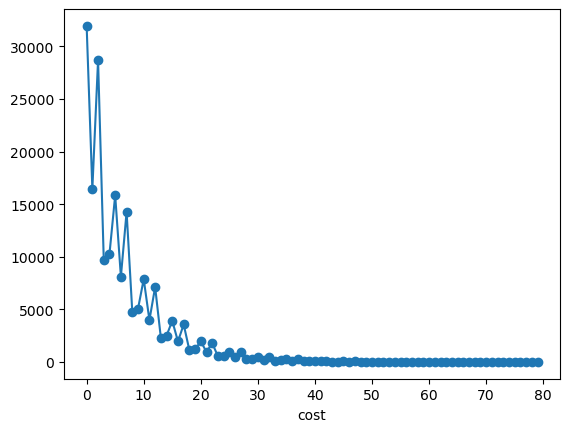

In [192]:
plt.plot(loss_St,marker="o")
plt.xlabel("iterations")
plt.xlabel("cost")

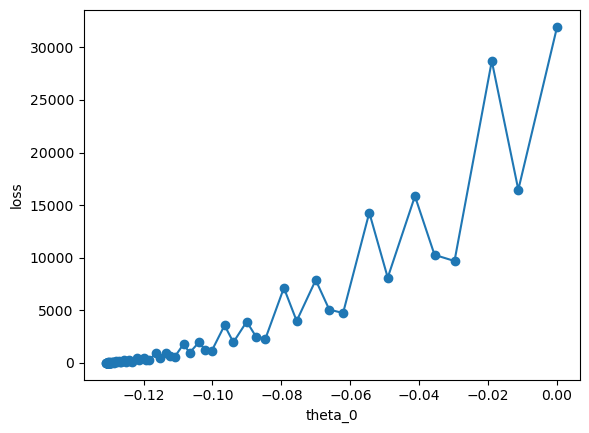

In [193]:
Theta_vs_loss (all_theta_0_St,loss_St,"theta_0")

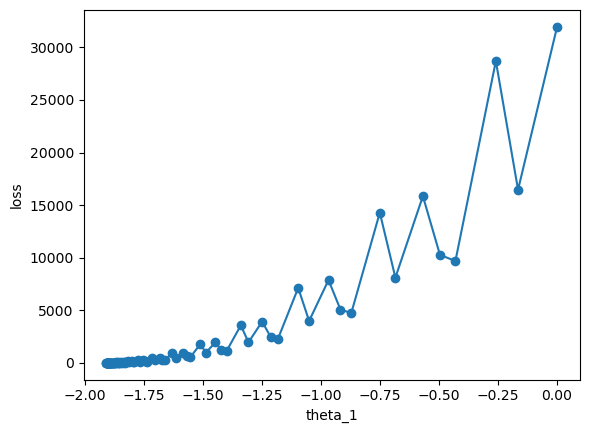

In [194]:
Theta_vs_loss (all_theta_1_St,loss_St,"theta_1")

Text(0.5, 1.0, 'best_line_fit')

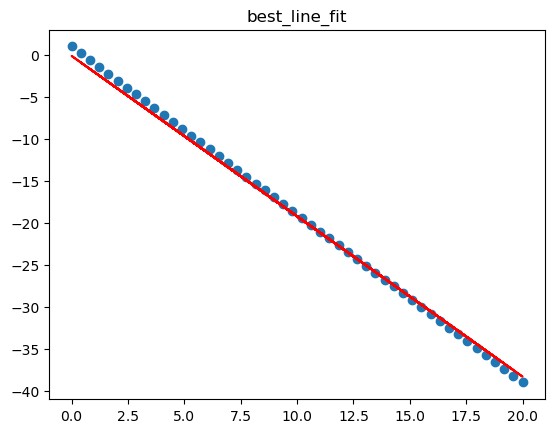

In [195]:
plt.scatter(X,y)
plt.plot(X,h,"r")
plt.title("best_line_fit")

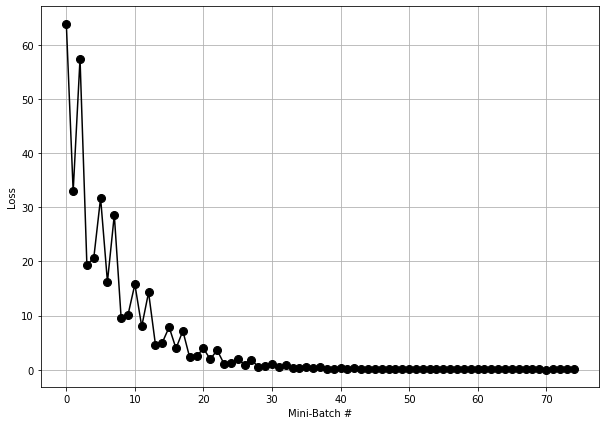

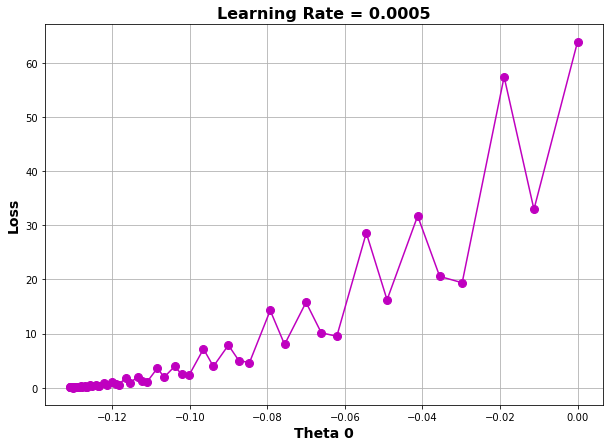

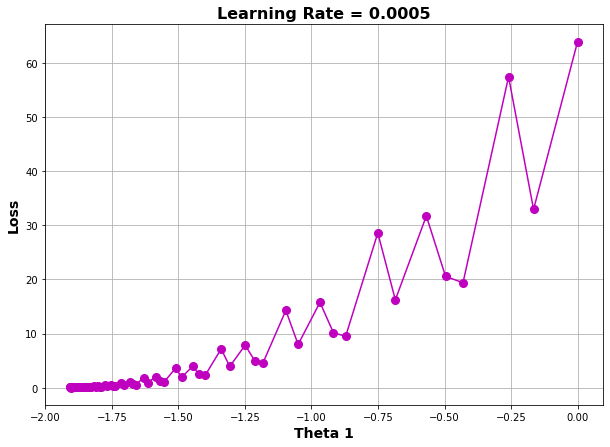

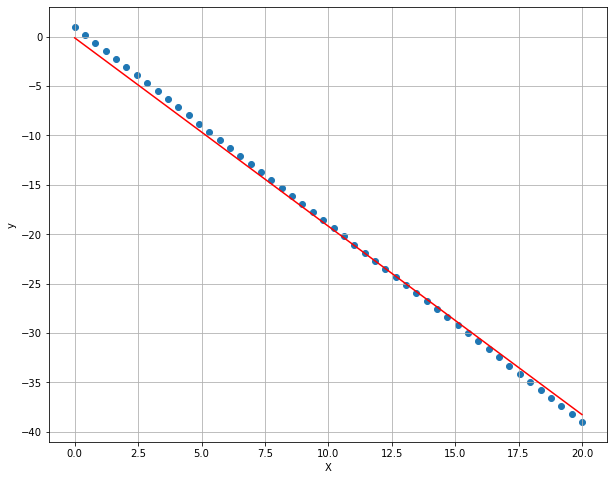

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [200]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = MB_GD_LR_1var(X,y,0.0005,300,20)

****************epoch0*******************
j:
 27790.79318114717
gradient_vector_norm: 84.2782927361842
theta_0_new: -0.02248661577432028
theta_1_new: -0.30756032481756423
****************epoch1*******************
j:
 19557.86560939659
gradient_vector_norm: 70.67780495840918
theta_0_new: -0.04130344504048236
theta_1_new: -0.5657333606401489
****************epoch2*******************
j:
 13762.778577420684
gradient_vector_norm: 59.26147883242835
theta_0_new: -0.057039844010433605
theta_1_new: -0.7824502972913535
****************epoch3*******************
j:
 9684.461158000006
gradient_vector_norm: 49.67855879333876
theta_0_new: -0.07019052314402992
theta_1_new: -0.9643686409333774
****************epoch4*******************
j:
 6814.99479042866
gradient_vector_norm: 41.63461828201749
theta_0_new: -0.08117074647609748
theta_1_new: -1.117076757156514
****************epoch5*******************
j:
 4796.624864945203
gradient_vector_norm: 34.88251388779039
theta_0_new: -0.09032909005694652
theta_1

****************** Epoch 0 ********************

Cost = 126.72088226258258

Gradient Vector:
[[ 17.21715959]
 [235.70388854]]

Gradient Vector Norm:
236.33187186393872

theta_0_new : -0.009846938775510206
theta_1_new : -0.13414348188254893

****************** Epoch 1 ********************

Cost = 95.59398940231527

Gradient Vector:
[[ 14.91075625]
 [204.69367855]]

Gradient Vector Norm:
205.2360413974638

theta_0_new : -0.026989538964647383
theta_1_new : -0.368489811723319

****************** Epoch 2 ********************

Cost = 72.11939213555958

Gradient Vector:
[[ 12.90783478]
 [177.76372394]]

Gradient Vector Norm:
178.23174169414992

theta_0_new : -0.04183877440396801
theta_1_new : -0.5720041697731717

****************** Epoch 3 ********************

Cost = 54.41582999784645

Gradient Vector:
[[ 11.1684637 ]
 [154.37715357]]

Gradient Vector Norm:
154.78061934303537

theta_0_new : -0.05469641056857394
theta_1_new : -0.7487433593228348

****************** Epoch 4 *******************

In [201]:
h = opt_theta_0_St+opt_theta_1_St*X
r2_score(y,h)

0.9980014726918578

r2_score 0.9975552566241764


Text(0.5, 0, 'cost')

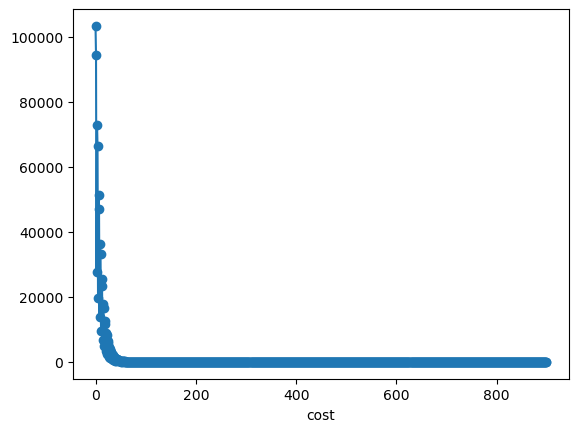

In [202]:
plt.plot(loss_St,marker="o")
plt.xlabel("iterations")
plt.xlabel("cost")

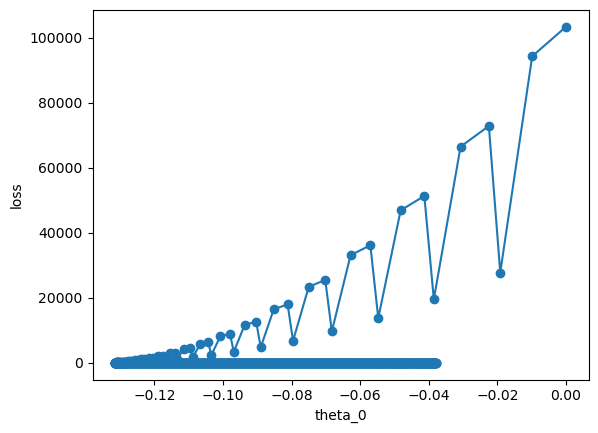

In [203]:
Theta_vs_loss (all_theta_0_St,loss_St,"theta_0")

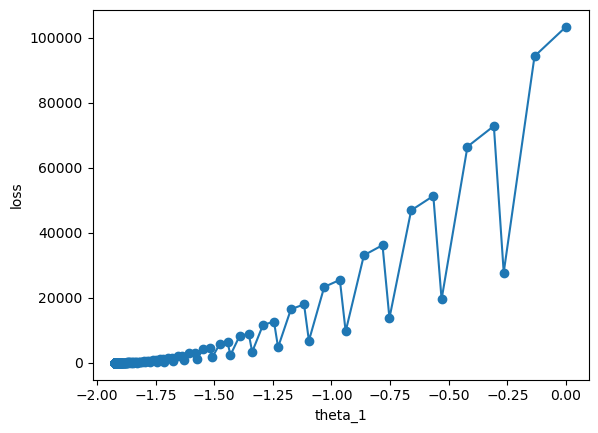

In [204]:
Theta_vs_loss (all_theta_1_St,loss_St,"theta_1")

Text(0.5, 1.0, 'best_line_fit')

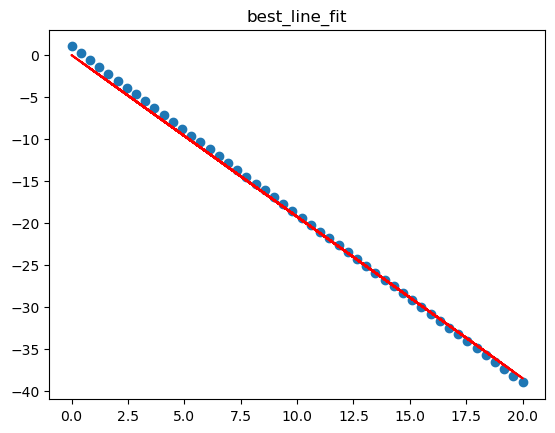

In [205]:
plt.scatter(X,y)
plt.plot(X,h,"r")
plt.title("best_line_fit")

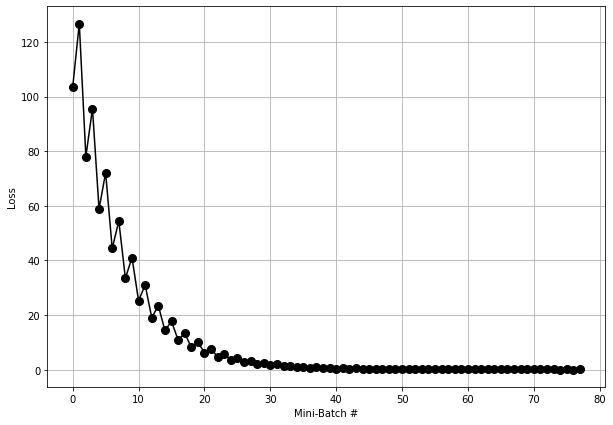

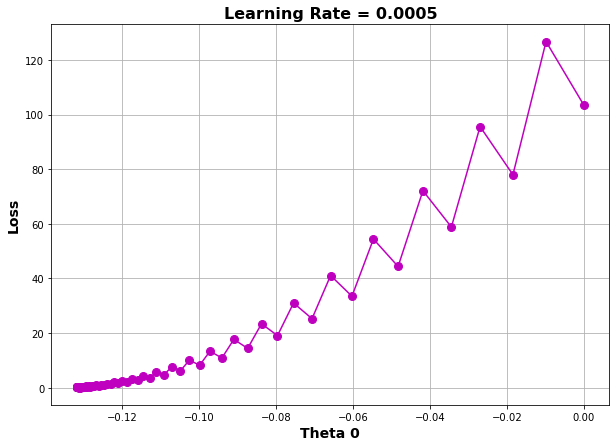

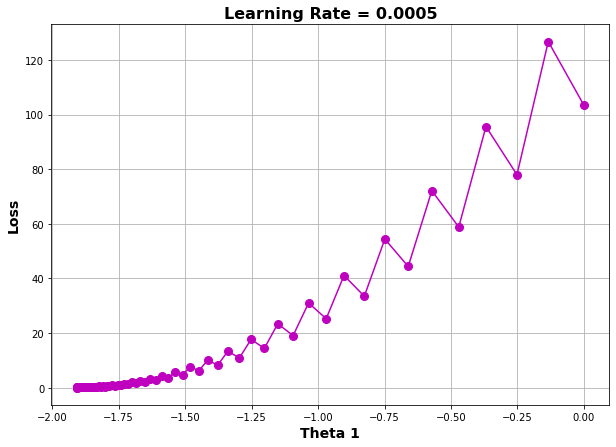

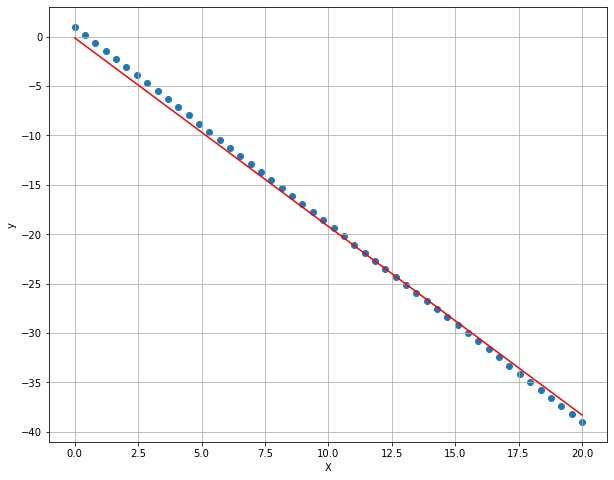